# Site Location Finder

## Import packages

In [24]:
# Import statements
import sys
from rasterio.plot import show
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

## Function Declarations

The next section of the code involves the declaration of the functions that are used within.

### readFile function

This function takes a file name as an argument and loops through each line in the file, returning the file to the variable which calls the function.

In [2]:
def readFile(file):
    '''
    Reads a file.

    :param file: The name of the file as it appears in the directory
    :return: returns the file that has been read into a list 
    '''
    # Creates fileList
    fileList = []
    # Opens the file
    f = open(file)
    # A loop which runs through each line in the file and adds them to the rowList list and then into the fileList
    for line in f:
        parsedLine = str.split(line,",")
        rowList = []
        for value in parsedLine:
            rowList.append(float(value))
        fileList.append(rowList)
    # Closes the file
    f.close()
    return fileList

### Processing and calculations 

The normaliseWeightings function takes in the individual weights set by the user for Geology, Popultion and Transportation and then normalises them so they add up to 1. This prevents the scores from exceeding 255 so that the map is plotted correctly. 

The method also uses an If statement to prevent the user from submiting a total weight value for all three attributes of 0. It prints an error message if this occurs and returns default weights of 50 for each attribute.

If the user assigns valid weights, the function normalises the weights by adding up the total weights and then dividing each weight by the total weight to create a decimal which totals to 1.

In [35]:
def normaliseWeights(geologyWeight, populationWeight, transportationWeight):
    '''
    Normalises the weights which are passed to it by the processData method. Tests to see if the values are all zero
    and prints an error message and returns the weights to a default value if so. If the values are not all zeroes, then
    the method normalises the weights, ensuring they add up to a total of 1.

    :param geologyWeight: The value of the weight assigned to the geology attribute
    :param populationWeight: The value of the weight assigned to the population attribute
    :param transportationWeight: The value of the weight assigned to the transportation attribute
    :return: returns the normalised weights or the default values if the arguments given are all 0.
    '''
    # Tests to see if all of the weights are set to 0. If so, it resets the weights to defaults and prints an error
    if geologyWeight == 0 and populationWeight == 0 and transportationWeight == 0:
        print('Error: Cannot create plot with all weight values set to 0. Values returned to default.' + 
              'Please try again')
        geologyWeight = 50
        populationWeight= 50
        transportationWeight = 50
        geoSlide.value = geologyWeight
        popSlide.value = populationWeight
        tranSlide.value = transportationWeigh
        return geologyWeight, populationWeight, transportationWeight
    else:
        # Normalise weights by adding up the weights and the dividing each weight by the total.
        total = geologyWeight + populationWeight + transportationWeight
        geologyWeight = geologyWeight / total
        populationWeight = populationWeight / total
        transportationWeight = transportationWeight / total
        return geologyWeight, populationWeight, transportationWeight

The processData function takes in the weights as an argument, then calls the normaliseWeights functions on the weights passed to it. It then creates a combined list of the values of each attribute for each area on the map and multiplies it by the relevant normalised weights. The combined weights are then added together and fed into the combined list. The combined list is then returned.  

In [4]:
def processData(geologyWeight, populationWeight, transportationWeight):
    '''
    Creates a combinedlist which combines the values for each location in the raster files factoring in the weights
    assigned

    :param geologyWeight: The value of the weight assigned to the geology attribute
    :param populationWeight: The value of the weight assigned to the population attribute
    :param transportationWeight: The value of the weight assigned to the transportation attribute
    :return: returns the combinedList
    '''
    # Calls the normaliseWeights function on each weight
    geologyWeight, populationWeight, transportationWeight = normaliseWeights(geologyWeight, populationWeight, transportationWeight)
    # Creates the combinedList list
    combinedList = []
    # Loops through each location in the raster files and multiplies each value by the relevant weight. This is added to
    # the combinedList
    for i in range(0, 529):
        rowList = []
        for j in range(0, 334):
            geoVal = geologyList[i][j] * geologyWeight
            popVal = populationList[i][j] * populationWeight
            transVal = transportationList[i][j] * transportationWeight
            totalVal = geoVal + popVal + transVal
            rowList.append(totalVal)
        combinedList.append(rowList)
    return combinedList

### Action methods

The onUpdateButtonClicked and onOutputButtonClicked functions are functions that activate when the relevant buttons in the GUI are clicked. 

The onUpdateButtonClicked function clears the current plot and then calculates a new plot based on the weights assigned via the sliders in the GUI. 

The onOutputButtonClicked function opens an output file named 'output.txt' and writes the results from the combinedList into the output file. 

In [5]:
def onUpdateButtonClicked(b):
    '''
    Clears the output and calls the processData function to redraw the plot based on weights taken from the sliders.
    This also displays the GUI.
    '''
    clear_output()
    cList = processData(geoSlide.value, popSlide.value, tranSlide.value)    
    show(cList, cmap='gray')
    display(popSlide, geoSlide, tranSlide, updateButton, outputButton)
    
def onOutputButtonClicked(b): 
    '''
    Opens an output file and saves the raster data, which makes up the current plot showing in the system, into
    the output file and then closes it
    '''
    outputFile = open("output.txt", "w")
    outputFile.write(str(cList))
    outputFile.close()

## Variable Declaration

The geologyFile, populationFile and transportationFile variables store the file names of the raster data which are stored in the same directory as this notebook.

The geologyList, populationList and transportationList variables call the readFile method on the relevant files and store the values once they have been read. 

In [6]:
# Variables that store file names
geologyFile = 'best.geology.txt'
populationFile = 'best.pop.txt'
transportationFile = 'best.mway.txt'

In [7]:
# Function calls to read relevant files and store them into lists
geologyList = readFile(geologyFile)
populationList = readFile(populationFile)
transportationList = readFile(transportationFile)

## Graphical User Interface

The popSlide, geoSlide and tranSlide are variable names for the three weight sliders that are shown in the GUI. They are set to a value of 50 by default but can be set to any integer between 0 and 100. 

The updateButton and outputButton variables store the buttons shown in the GUI which call the onUpdateButtonClicked and onOutputButtonClicked functions respectively. 

In [32]:
# Variables to create and store components of the Graphical User Interface
popSlide =  widgets.IntSlider(min = 0, max = 100, value = 50, description = 'Population')
geoSlide = widgets.IntSlider(min = 0, max = 100, value = 50, description = 'Geology')
tranSlide = widgets.IntSlider(min = 0, max = 100, value = 50, description = 'Transport')
updateButton = widgets.Button(description="Update")
outputButton = widgets.Button(description="Save Output")

## Results

This section dispays the results of the program and is where the GUI can be seen. The code below calls the processData functions and shows the map and displays the GUI componenents and sets the listeners. 

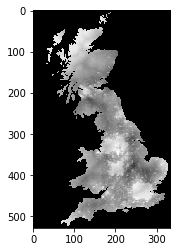

IntSlider(value=50, description='Population')

IntSlider(value=50, description='Geology')

IntSlider(value=50, description='Transport')

Button(description='Update', style=ButtonStyle())

Button(description='Save Output', style=ButtonStyle())

In [33]:
# Initial call of the processData method
cList = processData(geoSlide.value, popSlide.value, tranSlide.value) 
# Generates plot based on cList which is the combinedList
show(cList, cmap='gray')
#Initial call to display GUI components
display(popSlide, geoSlide, tranSlide, updateButton, outputButton)
updateButton.on_click(onUpdateButtonClicked)
outputButton.on_click(onOutputButtonClicked)